In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

from gators.util import benchmark

In [17]:
from gators.util import util
# sampling
from gators.sampling import SupervisedSampling, UnsupervisedSampling

# converter
# data cleaning
from gators.data_cleaning import (
    ConvertColumnDatatype,
    DropHighNaNRatio,
    DropLowCardinality,
    DropHighCardinality,
    DropDatatypeColumns,
    DropColumns,
    KeepColumns
)
# imputers
from gators.imputers import (
    NumericsImputer,
    ObjectImputer,
)
from gators.scalers import (
    StandardScaler,
    MinMaxScaler,
)
# encoders
from gators.encoders import (
    OneHotEncoder,
    WOEEncoder,
    TargetEncoder,
    OrdinalEncoder,
)
#clipping
from gators.clipping import Clipping
# binning
from gators.binning import (
    BinRareCategories, 
    QuantileBinning, 
    TreeBinning, 
    CustomBinning,
    Binning,
)
# feature generation
from gators.feature_generation import (
    ClusterStatistics,
    ElementaryArithmetics,
    PolynomialFeatures,
    OneHot,
    IsEqual,
    IsNull,
)
from gators.feature_generation_str import (
    StringContains,
    StringLength,
    Extract,
    SplitExtract,
    LowerCase,
    UpperCase,
)
from gators.feature_generation_dt import (
    CyclicMinuteOfHour,
    CyclicHourOfDay,
    CyclicDayOfMonth,
    CyclicDayOfWeek,
    CyclicMonthOfYear,
    OrdinalMinuteOfHour,
    OrdinalDayOfMonth,
    OrdinalMonthOfYear,
    OrdinalDayOfWeek,
    OrdinalHourOfDay,
    DeltaTime
)
# feature selection
from gators.feature_selection import (
    InformationValue,
    SelectFromModel,
)
# feature generation
from gators.feature_generation import PlaneRotation
# model building
from gators.model_building import (
    TrainTestSplit,
    XGBBoosterBuilder,
    XGBTreeliteDumper,
    LGBMTreeliteDumper,
)
# pipeline
from gators.pipeline import Pipeline

In [4]:
def run_benchmark(X):
    runtime_vec = []
    class_name_vec = []
    
    # DATA CLEANING

    
    

    obj = DropHighNaNRatio(max_ratio=0.5)
    class_name_vec.append(obj.__class__.__name__)
    print(psutil.swap_memory())
    print(obj.__class__.__name__)
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = DropLowCardinality(min_categories=10)
    class_name_vec.append(obj.__class__.__name__)
    print(psutil.swap_memory())
    print(obj.__class__.__name__)
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = DropHighCardinality(max_categories=100)
    class_name_vec.append(obj.__class__.__name__)
    print(psutil.swap_memory())
    print(obj.__class__.__name__)
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict', 'Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict', 'Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = DropDatatypeColumns(dtype=object)
    class_name_vec.append(obj.__class__.__name__)
    print(psutil.swap_memory())
    print(obj.__class__.__name__)
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X', 'Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X', 'Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = DropColumns(columns=['X'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X', 'Y']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X', 'Y']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = KeepColumns(columns_to_keep=['X'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())

    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X', 'Y']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X', 'Y']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

 
    # SAMPLING
    if 'dask' in str(type(X)):
        frac_dict = (X['y_multiclass'].value_counts(normalize=True) / 2).compute().to_dict()
    else:
        frac_dict = (X['y_multiclass'].value_counts(normalize=True) / 2).to_dict()

    obj = SupervisedSampling(frac_dict=frac_dict)
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new, y_new = obj.transform(X[['X']], X['y_multiclass'])
    else:
        result = %timeit -o -n 1 -r 3 X_new, y_new = obj.transform(X[['X']], X['y_multiclass'])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    obj = UnsupervisedSampling(n_samples=5000000)
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new, y_new = obj.transform(X[['X']], X['y_multiclass'])
    else:
        result = %timeit -o -n 1 -r 3 X_new, y_new = obj.transform(X[['X']], X['y_multiclass'])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    # SCALERS

    obj = MinMaxScaler()
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = StandardScaler()
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    # STRING FEATURE SELECTION


    obj = SplitExtract(columns=['Address'], str_split_vec=['\\'], idx_split_vec=[0])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = Extract(columns=['Address'], i_min_vec=[0], i_max_vec=[10])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = StringContains(columns=['Address'], contains_vec=['/'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = StringLength(columns=['Address'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = LowerCase(columns=['Address'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = UpperCase(columns=['Address'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    # FEATURE SELECTION

    obj = PlaneRotation(columns=[['X','Y']], theta_vec=[45])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X','Y']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X','Y']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = ClusterStatistics(clusters_dict={'dummy': ['X','Y']})
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X','Y']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X','Y']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = ElementaryArithmetics(columns_a=['X'], columns_b=['Y'], operator='+', coef=0.1)
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X','Y']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X','Y']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = IsNull(columns=['X'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X','Y']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X','Y']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = IsEqual(columns_a=['Descript'], columns_b=['Resolution'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X)
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = OneHot(categories_dict={'Descript': ['RESISTING ARREST', 'VEHICLE, RECOVERED, AUTO']})
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X)
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = PolynomialFeatures(columns=['X', 'Y'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X', 'Y']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X', 'Y']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    # ENCODERS

    obj = WOEEncoder()
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']], X['y_binary']).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']], X['y_binary'])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = TargetEncoder()
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']], X['y_binary']).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']], X['y_binary'])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = OrdinalEncoder()
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']], X['y_multiclass']).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']], X['y_multiclass'])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    obj = OneHotEncoder()
    class_name_vec.append(obj.__class__.__name__)
    print(psutil.swap_memory())
    print(obj.__class__.__name__)
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

#     X['y_multiclass'] = X['y_multiclass'].where(X['y_multiclass'] < 9, 9)
#     obj = MultiClassEncoder(WOEEncoder())
#     class_name_vec.append(obj.__class__.__name__)
#     print(obj.__class__.__name__)
#     print(psutil.swap_memory())
#     X['y_multiclass'] = X['y_multiclass'].where(X['y_multiclass'] < 9, 9)
#     if 'dask' in str(type(X)):    
#         result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']], X['y_multiclass']).compute()
#     else:
#         result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']], X['y_multiclass'])
#     runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


#     obj = RegressionEncoder(encoder=WOEEncoder(), binning=Binning(n_bins=10))
#     class_name_vec.append(obj.__class__.__name__)
#     print(obj.__class__.__name__)
#     print(psutil.swap_memory())
#     X['y_multiclass'] = X['y_multiclass'].where(X['y_multiclass'] < 9, 9)
#     if 'dask' in str(type(X)):    
#         result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']], X['y_regression']).compute()
#     else:
#         result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']], X['y_regression'])
#     runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    # DATETIME FEATURES
    X[['Dates']] = X[['Dates']].astype('datetime64[ns]')


    obj = CyclicMinuteOfHour(columns=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = CyclicHourOfDay(columns=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = CyclicDayOfMonth(columns=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = CyclicDayOfWeek(columns=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = CyclicMonthOfYear(columns=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = OrdinalMinuteOfHour(columns=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = OrdinalDayOfMonth(columns=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = OrdinalMonthOfYear(columns=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = OrdinalDayOfWeek(columns=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = OrdinalHourOfDay(columns=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    obj = DeltaTime(columns_a=['Dates'], columns_b=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(psutil.swap_memory())
    print(obj.__class__.__name__)
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    # BINNING

    obj = BinRareCategories(min_ratio=0.003)
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Address']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = Binning(n_bins=10, inplace=True)
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = QuantileBinning(n_bins=10, inplace=True)
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = TreeBinning(tree=DecisionTreeClassifier(max_depth=6, random_state=0, min_samples_leaf=500), inplace=True)
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 1 X_new = obj.fit_transform(X[['X']], X['y_binary']).compute()
    else:
        result = %timeit -o -n 1 -r 1 X_new = obj.fit_transform(X[['X']], X['y_binary'])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    if 'dask' in str(type(X)):
        X[['X']] = X[['X']].mask(X['Unnamed: 0'] < 1000, np.nan)
        X[['PdDistrict']] = X[['PdDistrict']].mask(X['Unnamed: 0'] < 1000, np.nan)
    else:
        X[['X']].loc[:1000] = np.nan
        X[['PdDistrict']].loc[:1000] = None


    obj = NumericsImputer(strategy='mean')
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))


    obj = ObjectImputer(strategy='most_frequent')
    class_name_vec.append(obj.__class__.__name__)
    print(obj.__class__.__name__)
    print(psutil.swap_memory())
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['PdDistrict']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))
    # SAMPLING
    if 'dask' in str(type(X)):
        frac_dict = (X['y_multiclass'].value_counts(normalize=True) / 2).compute().to_dict()
    else:
        frac_dict = (X['y_multiclass'].value_counts(normalize=True) / 2).to_dict()
        
    # CLIPPING

    obj = Clipping(clip_dict={'X': [-122., -120.]})
    class_name_vec.append(obj.__class__.__name__)
    print(psutil.swap_memory())
    print(obj.__class__.__name__)
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['X']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    return class_name_vec, runtime_vec

In [21]:
def run_benchmark(X):
    runtime_vec = []
    class_name_vec = []
    
    # CLIPPING
    X['Dates'] = X['Dates'].astype('datetime64[ns]')
    obj = DeltaTime(columns_a=['Dates'], columns_b=['Dates'])
    class_name_vec.append(obj.__class__.__name__)
    print(psutil.swap_memory())
    print(obj.__class__.__name__)
    if 'dask' in str(type(X)):
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']]).compute()
    else:
        result = %timeit -o -n 1 -r 3 X_new = obj.fit_transform(X[['Dates']])
    runtime_vec.append(benchmark.get_runtime_in_milliseconds(str(result)))

    return class_name_vec, runtime_vec


# Pandas

In [22]:
import pandas as pd
import psutil

In [23]:
# X = pd.read_parquet('../../../Documents/data/data_10mil.parquet')
class_name_vec, runtime_vec = run_benchmark(X)
results = pd.DataFrame(index=class_name_vec, columns=['pandas', 'dask', 'koalas'])
results['pandas'] = runtime_vec

sswap(total=3221225472, used=2610167808, free=611057664, percent=81.0, sin=12782731264, sout=114159616)
DeltaTime
262 ms ± 26.2 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


# Dask

In [24]:
import pandas as pd
import dask.dataframe as dd

In [25]:
X = dd.read_csv('../../../Documents/data/data_10mil_*.csv')
X = X.persist()
class_name_vec, runtime_vec = run_benchmark(X)
results['dask'] = runtime_vec

sswap(total=3221225472, used=2610167808, free=611057664, percent=81.0, sin=12782731264, sout=114159616)
DeltaTime
1.46 s ± 54.1 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


# Koalas

In [10]:
from pyspark import SparkConf, SparkContext
conf = SparkConf()
conf.set('spark.executor.memory', '20g')
conf.set('spark.driver.memory', '20g')
sc = SparkContext(conf=conf)
import databricks.koalas as ks 
import pandas as pd
import numpy as np
ks.set_option('compute.default_index_type', 'distributed-sequence')

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/10 10:49:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
21/12/10 10:49:34 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [26]:
X = ks.read_parquet('../../../Documents/data/data_10mil.parquet')
class_name_vec, runtime_vec = run_benchmark(X)
results['koalas'] = runtime_vec

sswap(total=3221225472, used=2610167808, free=611057664, percent=81.0, sin=12783185920, sout=114159616)
DeltaTime
48.9 ms ± 8.31 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [27]:
import matplotlib.pyplot as plt

In [28]:
# results.to_csv('benchmark_fit_transform.csv')

pandas    262.0
Name: DeltaTime, dtype: float64
1.46


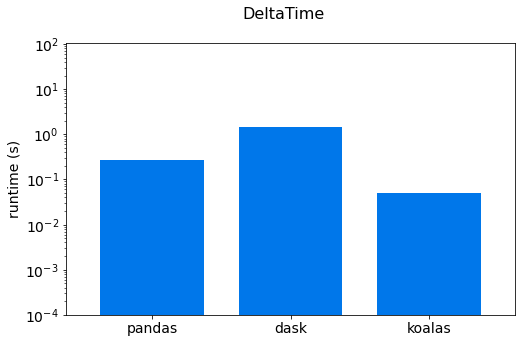

In [29]:
for ind in results.index:
    n = (np.ceil(np.log10((1e-3 * results.loc[ind]).max())))
    fig, ax = plt.subplots()
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    print(results.loc[ind].iloc[:1])
    print((1e-3 * results.loc[ind]).max())
    if (1e-3 * results.loc[ind]).max() < 1:
        ylim = [5e-4, 1.5]
    else:
        ylim = [1e-2, 10**n +5]
    
    ylim = [1e-4, 10**2 +5]
        
    (1e-3 * results.loc[ind]).plot.bar(
                logy=True,
                ax=ax,
                ylabel="runtime (s)",
                ylim=ylim,
                rot=0,
                color="#0077ea",
                legend=False,
                figsize=[5 * 1.61, 5],
                width=0.75,
                fontsize=14,
            )
    plt.suptitle(ind, fontsize=16)
    plt.show()
    fig.tight_layout()
    fig.savefig(f"figs/{ind}_fit_transform.jpg")
    plt.close(fig)

In [15]:
results.sum(0)

pandas     6560.0
dask       4250.0
koalas    20700.0
dtype: float64

In [16]:
results_old = pd.read_csv('benchmarking_fit_transform.csv', index_col=0)
results_old

FileNotFoundError: [Errno 2] No such file or directory: 'benchmarking_fit_transform.csv'

In [ ]:
X['y_multiclass'] = X['y_multiclass'].where(X['y_multiclass'] < 9, 9)
obj = MultiClassEncoder(WOEEncoder())
obj.fit_transform(X[['PdDistrict']], X['y_multiclass']).compute()

In [ ]:
import time
to = time.time()

time.time() - to

In [ ]:
results['koalas_old'] = results_old['koalas']